In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Obteniendo los datos

In [39]:
!wget https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv

--2018-10-14 23:42:51--  https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.32K  --.-KB/s    in 0.008s  

2018-10-14 23:42:51 (2.91 MB/s) - ‘diabetes.csv’ saved [23875/23875]



In [0]:
dataset = pd.read_csv("diabetes.csv")

In [42]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
dataset.shape

(768, 9)

In [0]:
features = dataset.drop(["Outcome"], axis=1)
X = np.array(features)
y = np.array(dataset["Outcome"])

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

# Creando el modelo

In [0]:
tree = DecisionTreeClassifier()

In [141]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
tree.tree_.max_depth

15

In [0]:
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [144]:
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  1.0
Exactitud validation data:  0.7922077922077922


# Mostrando el arbol de forma visual

In [0]:
!apt-get install graphviz

In [57]:
!pip install graphviz

In [0]:
import graphviz 
from sklearn.tree import export_graphviz

In [0]:
feature_names = features.columns

In [0]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

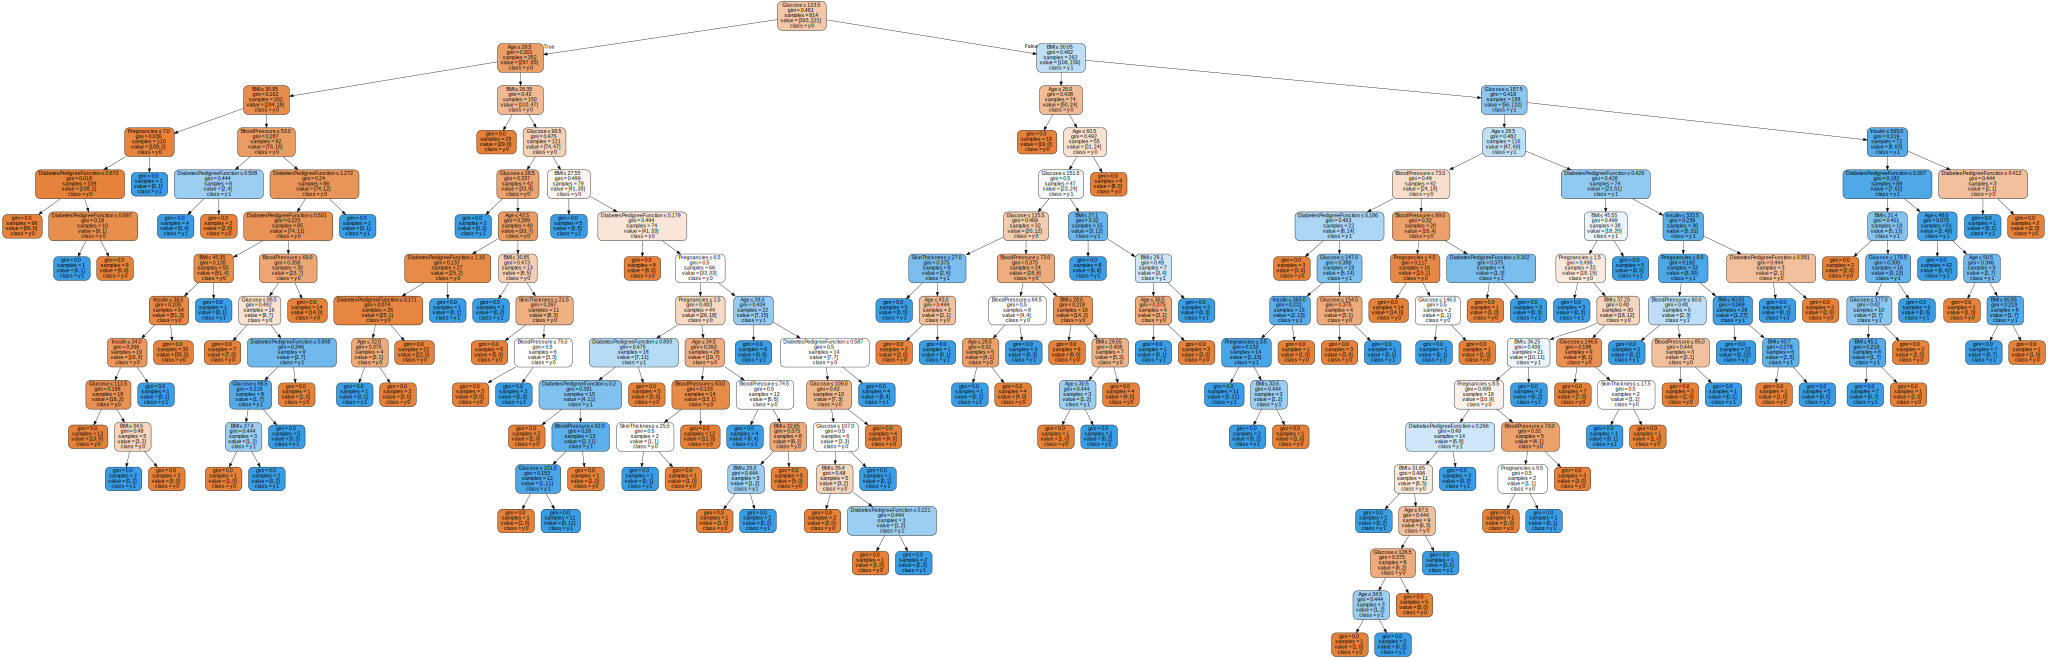

In [147]:
graph

# Creando el segundo modelo

In [0]:
tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=8, min_samples_split=50)

In [149]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [151]:
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  0.7964169381107492
Exactitud validation data:  0.8116883116883117


In [0]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

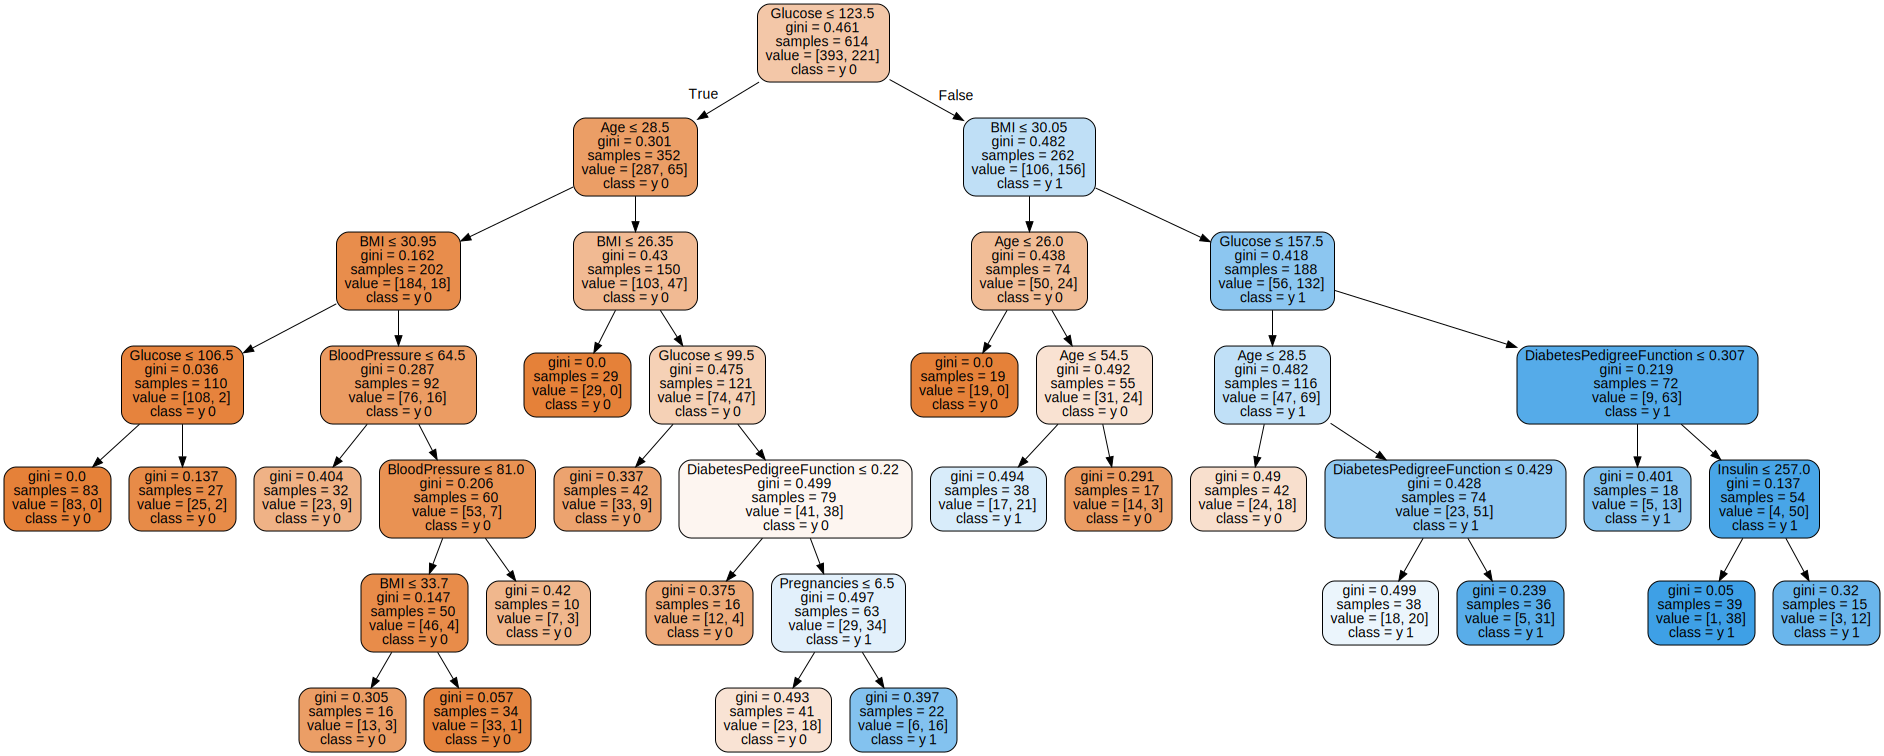

In [153]:
graph